
## Ejercicio: geyser

Considere el conjunto de datos geyser de la libreria MASS. Haga un análisis del dataset.

1- Ajustar un modelo mixto con dos normales multivaridas: mod1.



5- Explore el paquete mclust o el que quiera utilizar y uselo en el dataset geyser.
Ejercicio: hacking mixture models

1- Genere un conjunto de datos univariados con una distribución que no sea normal y observe los resultados. (Sugerencia: utilizar una distribución asimétrica)

2- ¿Qué tan sensible es la estimación de parámetros del modelo mixto a la presencia de valores atípicos?

3- ¿Qué sucede cuando la dimensión de los datos es mucho mayor a la cantidad de observaciones?


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [3]:
geyser = pd.read_csv("geyser.csv")
geyser.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(geyser[["eruptions","waiting"]])

print("bic of the gmm",gmm.bic(geyser))
gmm.predict(geyser)[:10]

bic of the gmm 2322.1919542678497


array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

### 2) Utilize el criterio BIC para seleccionar el mejor modelo: mod2.

In [5]:
k = 20
list_bic = []

for n_cluster in np.arange(1,k):
    clf = GaussianMixture(n_components=n_cluster, n_init=50,covariance_type= "tied", random_state=42).fit(geyser[["eruptions","waiting"]])
    list_bic.append(clf.bic(geyser))
best_cant_clusters = np.argmin(list_bic)+1

best_gmm = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(geyser[["eruptions","waiting"]])


print("mejor cantidad de clusters, segun bayesian index criteria: ",best_cant_clusters)
best_gmm.predict(geyser)[:10]

mejor cantidad de clusters, segun bayesian index criteria:  3


array([0, 1, 0, 1, 0, 2, 0, 0, 1, 0])

### 3) Compare mod1 con mod2.

In [6]:
print(gmm.bic(geyser))
print(best_gmm.bic(geyser))

2322.1919542678497
2334.8254429075505


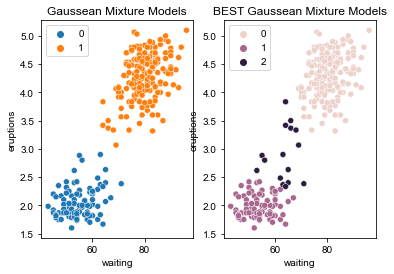

In [7]:
fig, ax = plt.subplots(1, 2)

sns.scatterplot(data = geyser, x = "waiting", y = "eruptions", hue = gmm.predict(geyser), ax= ax[0])

#Comparemos con Kmeans
ax[0].set_title("Gaussean Mixture Models")
kms=KMeans(n_clusters=3).fit(geyser)


ax[1].set_title("BEST Gaussean Mixture Models")

sns.scatterplot(data = geyser, x = "waiting", y= "eruptions", hue = best_gmm.predict(geyser), ax = ax[1]);

sns.set(rc = {'figure.figsize':(8,4)})

### KMEANS vs GAUSSEAN MIXTURE MODEL

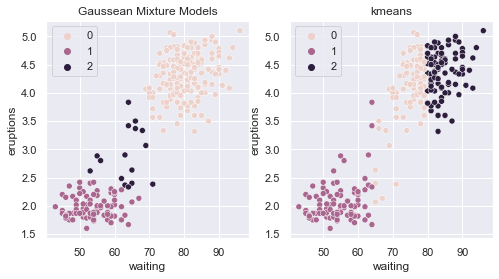

In [8]:
fig, ax1 = plt.subplots(1, 2)

sns.scatterplot(data = geyser, x = "waiting", y = "eruptions", hue = best_gmm.predict(geyser), ax= ax1[0])

#Comparemos con Kmeans
ax1[0].set_title("Gaussean Mixture Models")
kms=KMeans(n_clusters=3).fit(geyser)


ax1[1].set_title("kmeans")

sns.scatterplot(data = geyser, x = "waiting", y= "eruptions", hue = kms.labels_, ax = ax1[1]);

sns.set(rc = {'figure.figsize':(8,4)})

Observamos como los resultados varian, ya que kmeans, solo puede capturar cluster circulares, y que tengan la misma varianza(mismo tamaño de nube de puntos), gmm hace un mejor trabajo (se observa claramente como divide en 2 el cluster de mas arriba, cuando lo mas logico es que sean de la misma naturaleza), a cuenta de un mayor costo computacional.

### 4) ¿Hay algunos puntos para los cuales no este clara la clasificación?¿Qué puede decir sobre ellos?

Es un estilo "uncertenty" de R, estas son las 10 observaciones que tienen menor probabilidad de pertenecer al cluster donde fueron clasificadas. Es la probabilidad a posteriori de la observacion para el cluster donde fue situada.

In [9]:
# Entre todos los "k" clusters, este es el que mas probabilidad tiene de estar, es la posteriori
pd.Series(1 - np.max(best_gmm.predict_proba(geyser), axis = 1))[:10] #UNCERTENTY DE R, es el complemento


0    0.009744
1    0.020819
2    0.302708
3    0.379362
4    0.000023
5    0.000904
6    0.000005
7    0.000705
8    0.008779
9    0.000034
dtype: float64

### "ANOMALY DETECTION" ENCONTRAR OUTLIERS CON LOG LIKELIHOOD

In [63]:

geyser_outlier=pd.read_csv("geyser_outliers_r.csv", index_col='Unnamed: 0')

gmm_outlier = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(geyser_outlier)

scores = gmm.score_samples(geyser_outlier)

threshold_outliers = np.quantile(scores, .05)

index = np.where(scores <= threshold_outliers)[0]

geyser_outlier["outliers"] = 0
geyser_outlier.loc[index, "outliers"] = 1

/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- duration
Feature names seen at fit time, yet now missing:
- eruptions

  warnings.warn(message, FutureWarning)


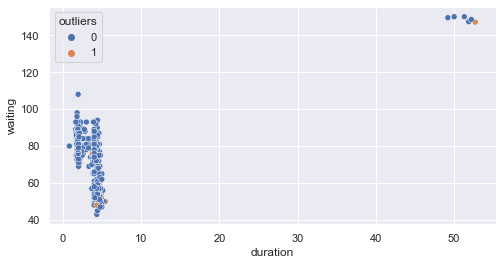

In [64]:
sns.scatterplot(data = geyser_outlier, x = "duration", y= "waiting", hue = 'outliers');

### 5) Explore el paquete mclust o el que quiera utilizar y uselo en el dataset geyser.


Ejercicio: hacking mixture models

1- Genere un conjunto de datos univariados con una distribución que no sea normal y observe los resultados. (Sugerencia: utilizar una distribución asimétrica)

2- ¿Qué tan sensible es la estimación de parámetros del modelo mixto a la presencia de valores atípicos?

3- ¿Qué sucede cuando la dimensión de los datos es mucho mayor a la cantidad de observaciones?
